In [1]:
import matplotlib.pyplot as plt

In [2]:
# vertices1 = [(422,542),(694,552),(844,520),(896,705),(399,850),(749,920),(1286,550),(1538,224),(1517,266),(1612,328),(2372,127),(2630,20),(3017,108),(3060,155),(3684,445),(3938,516),(3829,513),(2614,195),(2503,352),(2310,635),(2330,741),(1213,910),(1490,1123),(1423,1322),(1729,1498),(1794,1589),(1697,1924),(1526,1612),(839,1355),(782,1462),(731,1741),(1090,1652),(1182,1853),(962,1895),(706,1925),(563,1513),(627,1261),(556,1056),(376,1018),(193,1210),(177,1390),(3,1817),(71,1323),(298,615),(171,514),(61,81),(347,252),(387,190),(468,319),(380,478)]
# vertices1 = [(3017,108),(3140,1401),(3220,1454),(3114,1629),(2937,1568),(2741,1583),(2489,1520),(2408,1747),(2426,1851),(2191,1579),(2132,1432),(2312,1270),(2030,1186),(2009,1163),(2000,1110),(1782,995),(1829,812),(1490,1123),(1423,1322),(1526,1612),(1729,1498),(1794,1589),(1697,1924),(1182,1853),(1090,1652),(962,1895),(706,1925),(731,1741),(782,1462),(839,1355),(627,1261),(556,1056),(376,1018),(399,850),(298,615),(422,542),(380,478),(468,319),(347,252),(387,190),(61,81),(171,514),(694,552),(844,520),(896,705),(749,920),(1213,910),(563,1513),(177,1390),(3370,791)]

In [3]:
# vertices2 = [(3782,1865),(3611,1968),(3453,1998),(3317,1966),(3245,1828),(3114,1629),(2937,1568),(2741,1583),(2489,1520),(2408,1747),(2426,1851),(2191,1579),(2132,1432),(2030,1186),(2009,1163),(1782,995),(1829,812),(2000,1110),(2312,1270),(2642,1269),(2639,1239),(2698,1221),(2801,695),(2800,653),(2830,775),(2929,485),(2938,543),(3123,217),(3292,152),(3595,111),(3821,147),(3162,367),(3084,748),(3084,774),(3370,791),(3438,901),(3058,1276),(3133,1143),(3140,1401),(3220,1454),(3515,1892),(3417,1808),(3507,1851),(3675,1522),(3876,1165),(3896,742),(3918,1088),(3858,1472),(3904,1444),(3834,1827)]
# vertices2 = [(3,1817),(3060,155),(3123,217),(3162,367),(3292,152),(3595,111),(3821,147),(3684,445),(3829,513),(3938,516),(3896,742),(3918,1088),(3876,1165),(3904,1444),(3858,1472),(3675,1522),(3834,1827),(3782,1865),(3611,1968),(3515,1892),(3507,1851),(3417,1808),(3245,1828),(3317,1966),(3453,1998),(3058,1276),(3133,1143),(3084,774),(3084,748),(2938,543),(2929,485),(2800,653),(2801,695),(2830,775),(2698,1221),(2639,1239),(2642,1269),(2330,741),(2310,635),(2503,352),(2614,195),(2630,20),(2372,127),(1612,328),(1517,266),(1538,224),(1286,550),(193,1210),(71,1323),(3438,901)]

In [78]:
# filename = "output/greedy_cycle.data"
# filename = "output/greedy_2regret_cycle.data"


def read_data(filename):
    with open(filename) as f:
        data = f.readlines()
        A = data[0].split(";")
        A = [(int(a.split(" ")[0]),int(a.split(" ")[1])) for a in A]
        B = data[1].split(";")
        B = [(int(b.split(" ")[0]),int(b.split(" ")[1])) for b in B]
    
    return A,B

def draw_plot(filename):
    vertices1, vertices2 = read_data(filename)
    # tworzenie listy współrzędnych x i y dla pierwszego cyklu
    x1 = [v[0] for v in vertices1]
    y1 = [v[1] for v in vertices1]

    # tworzenie listy współrzędnych x i y dla drugiego cyklu
    x2 = [v[0] for v in vertices2]
    y2 = [v[1] for v in vertices2]

    # tworzenie wykresu
    fig, ax = plt.subplots()

    # rysowanie krawędzi między kolejnymi wierzchołkami pierwszego cyklu
    for i in range(len(vertices1)-1):
        ax.plot([x1[i], x1[i+1]], [y1[i], y1[i+1]], color='red')

    # rysowanie krawędzi między ostatnim i pierwszym wierzchołkiem pierwszego cyklu, aby zamknąć cykl
    ax.plot([x1[-1], x1[0]], [y1[-1], y1[0]], color='red')

    # rysowanie krawędzi między kolejnymi wierzchołkami drugiego cyklu
    for i in range(len(vertices2)-1):
        ax.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color='blue')

    # rysowanie krawędzi między ostatnim i pierwszym wierzchołkiem drugiego cyklu, aby zamknąć cykl
    ax.plot([x2[-1], x2[0]], [y2[-1], y2[0]], color='blue')

    # zaznaczanie punktów kropkami dla pierwszego cyklu
    ax.plot(x1, y1, 'o', color='red')

    # zaznaczanie punktów kropkami dla drugiego cyklu
    ax.plot(x2, y2, 'o', color='blue')

    # wyświetlenie wykresu
    fig.set_size_inches(6, 6)
    plt.show()

def draw_plot_compare(files, names = None, size = 7):
    fig, axs = plt.subplots(nrows=1, ncols=len(files),figsize=(len(files)*size,size))
    
    # plt.setp(axs.flat, aspect=1.0, adjustable='box-forced')
    # plt.setp(axs.flat, aspect=1.0, adjustable='box-forced')

    for index,(ax, filename) in enumerate(zip(axs,files)):
        vertices1, vertices2 = read_data(filename)
        # tworzenie listy współrzędnych x i y dla pierwszego cyklu
        x1 = [v[0] for v in vertices1]
        y1 = [v[1] for v in vertices1]

        # tworzenie listy współrzędnych x i y dla drugiego cyklu
        x2 = [v[0] for v in vertices2]
        y2 = [v[1] for v in vertices2]
        # rysowanie krawędzi między kolejnymi wierzchołkami pierwszego cyklu
        for i in range(len(vertices1)-1):
            ax.plot([x1[i], x1[i+1]], [y1[i], y1[i+1]], color='red')

        # rysowanie krawędzi między ostatnim i pierwszym wierzchołkiem pierwszego cyklu, aby zamknąć cykl
        ax.plot([x1[-1], x1[0]], [y1[-1], y1[0]], color='red')

        # rysowanie krawędzi między kolejnymi wierzchołkami drugiego cyklu
        for i in range(len(vertices2)-1):
            ax.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color='blue')

        # rysowanie krawędzi między ostatnim i pierwszym wierzchołkiem drugiego cyklu, aby zamknąć cykl
        ax.plot([x2[-1], x2[0]], [y2[-1], y2[0]], color='blue')

        # zaznaczanie punktów kropkami dla pierwszego cyklu
        ax.plot(x1, y1, 'o', color='red')

        # zaznaczanie punktów kropkami dla drugiego cyklu
        ax.plot(x2, y2, 'o', color='blue')

        if not names is None: 
            ax.set_title(names[index])
    plt.show()

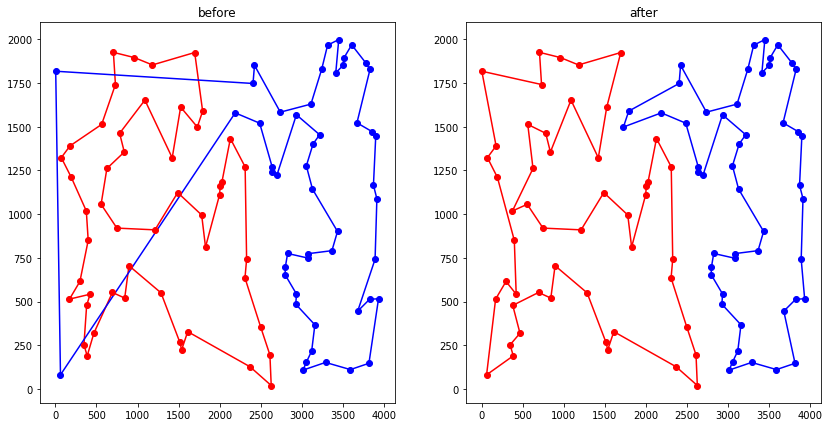

In [80]:
# filename = "output/nearest_neighbor.data"
# filename = "output/greedy_cycle.data"
filename1 = "output/before.data"
filename2 = "output/after.data"


# draw_plot(filename1)
# draw_plot(filename2)
draw_plot_compare([filename1,filename2], ["before", "after"])

